In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [6]:
#normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#train-test split
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
#train knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 1.0


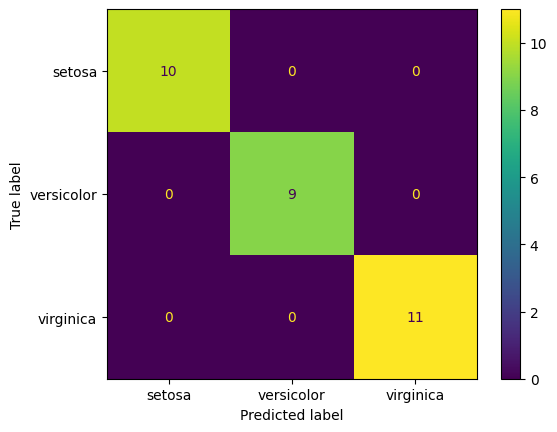

In [18]:
#ecaluating model
#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

In [19]:
#diffrent value of k
accuracy_list = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_list.append(acc)
    print(f"K={k} → Accuracy: {acc:.3f}")

K=1 → Accuracy: 0.967
K=2 → Accuracy: 1.000
K=3 → Accuracy: 1.000
K=4 → Accuracy: 1.000
K=5 → Accuracy: 1.000
K=6 → Accuracy: 1.000
K=7 → Accuracy: 1.000
K=8 → Accuracy: 1.000
K=9 → Accuracy: 1.000
K=10 → Accuracy: 1.000


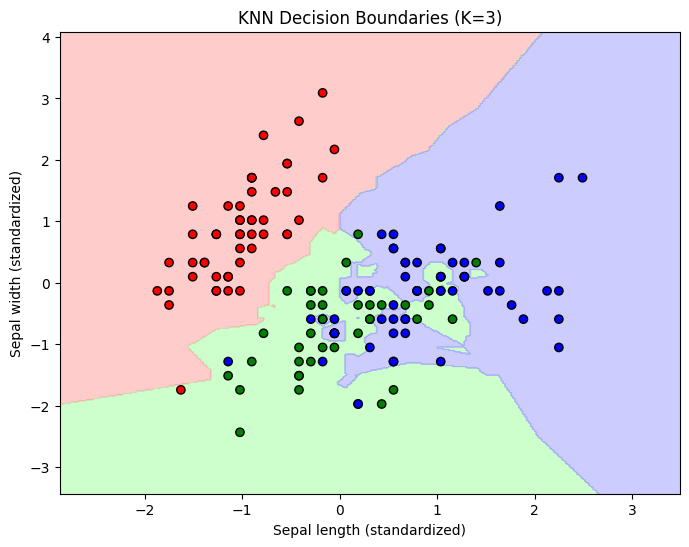

In [20]:
#visualization
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title("KNN Decision Boundaries (K=3)")
plt.show()